<a href="https://colab.research.google.com/github/harshitadd/CrossSiloFLDemo/blob/master/TorchScratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from torch import nn 

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

MLP 

In [0]:
torch.manual_seed(7)

features = torch.randn((1,5)) #tuple of size - 1 row 5 columns 
weights = torch.randn_like(features) #array_like 
bias = torch.randn((1,1))

In [0]:
res = activation(torch.sum(features*weights)+bias) #without 

In [0]:
print(res)

tensor([[0.1595]])


In [0]:
features.shape


torch.Size([1, 5])

In [0]:
weights = weights.view(5,1)

In [0]:
res = activation(torch.mm(features,weights)+bias)

In [0]:
print(res)

tensor([[0.1595]])


Shallow NN 

In [0]:
 features = torch.randn((1,3))
 n_input = features.shape[1] ## 3 - would be the number of units you need in the input layer 
 n_hidden = 3 
 n_output = 1 

 W1 = torch.randn((n_input,n_hidden))
 W2 = torch.randn((n_hidden,n_output))

 B1 = torch.randn((1,n_hidden)) # we will start introducing bias from the 1st hidden layer onwards
 B2 = torch.randn((1,n_output))



In [0]:
hidden_res = activation(torch.mm(features,W1) + B1) 

In [0]:
final_res = activation(torch.mm(hidden_res,W2)+B2)

In [0]:
print(final_res)

tensor([[0.7148]])


NP TO TORCH


In [0]:
a = np.random.rand(2,5)

In [0]:
b = torch.from_numpy(a)

In [0]:
b 


tensor([[0.2452, 0.7849, 0.2285, 0.7536, 0.3655],
        [0.8318, 0.3084, 0.5065, 0.5925, 0.7638]], dtype=torch.float64)

In [0]:
b.numpy()

array([[0.24517551, 0.78488367, 0.22853393, 0.75355806, 0.36554748],
       [0.83175924, 0.30841193, 0.50646455, 0.59253301, 0.76383079]])

In [0]:
#INPLACE OPS 


b.mul_(4)

tensor([[0.9807, 3.1395, 0.9141, 3.0142, 1.4622],
        [3.3270, 1.2336, 2.0259, 2.3701, 3.0553]], dtype=torch.float64)

In [0]:
a

array([[0.98070204, 3.13953467, 0.9141357 , 3.01423224, 1.4621899 ],
       [3.32703696, 1.23364772, 2.02585821, 2.37013206, 3.05532315]])

NNs with PyTorch 


In [0]:
from torchvision import datasets, transforms 

#Normalizer 
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:

# ITERATOR 
dataiter = iter(trainloader)
images, labels = dataiter.next()


print(type(images))
print(images.shape) # (bs, channel, dim1, dim2 )
print(labels.shape)



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


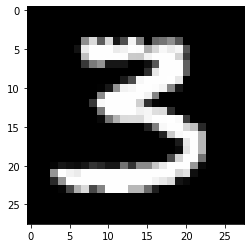

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
images.shape[0]

64

In [0]:
""" images was of the shape - 64 * 1 * 28 * 28 
view was told to reshape it into - 64*(whatever shape it took after collapsing all axis')
"""

In [0]:
## For flattening the image 

"""
here the softmax numerator - will be the logits of all the output classes 
it is divided by the summation for all instances to normalise the value between the range 
of 0 and 1 
"""
inputs = images.view(images.shape[0],-1)


In [0]:
inputs.shape

torch.Size([64, 784])

In [0]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim = 1).view(1,-1)



In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    ## Define the archicture of your model - layers, loss function , activation function, technically training related parameters are defined 

    ##Because the input neurons are linear/identity - the input layer is made using Linear 
    self.hidden = nn.Linear(784,256)  #input_feature_vector dimensions *ouput neurons number in the hidden layers 
    self.output = nn.Linear(256,10)
    self.softmax = nn.Softmax(dim=1)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self,x):
    ## x here is the input tensor - shape of the input tensor matches the input dimensions of the defined architecture 
    x = self.hidden(x) # the hidden layer transformation is applied to the input tensor and then the output of the layer is reassigned to x i.e the incoming output tensor only 
    x = self.relu(x)
    x = self.output(x)
    x = self.softmax(x)

    return x 



In [0]:
model = Network()
model


Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)

In [0]:
## EXERCISE 

class MyNet(nn.Module):
  def __init__():
    super().__init__()

    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    self.softmax = nn.Softmax()
    self.relu = nn.RELU()

  def forward(self,x):

    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)
    x = self.relu(x)
    x = self.output(x)
    x = self.softmax(x)

    return x 
  

In [0]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

criterion = nn.CrossEntropyLoss()

images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

tensor(2.2947, grad_fn=<NllLossBackward>)


In [0]:
## EXERCISE 

model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1))  ##check - why LogSoftmax and NLL dependence 

criterion = nn.NLLLoss()

logits = model(images)

loss = criterion(logits,labels)

In [0]:
print(loss)

tensor(2.3130, grad_fn=<NllLossBackward>)


In [0]:
##AUTOGRAD
loss.backward()

In [0]:
##OPTIMIZER - so an optimizer step is one set of weight updation 

from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [0]:
# having defined model, criterion, and optimizer 

epochs = 3 
for epoch in range(epochs):
  training_loss = 0
  for images, labels in trainloader:
   images = images.view(images.shape[0],-1)
   optimizer.zero_grad()
   logits = model.forward(images)
   instance_loss = criterion(logits,labels)
   instance_loss.backward()
   optimizer.step()
   training_loss+=instance_loss
  
  print('Training loss -', training_loss/len(trainloader))


Training loss - tensor(1.0112, grad_fn=<DivBackward0>)
Training loss - tensor(0.3837, grad_fn=<DivBackward0>)
Training loss - tensor(0.3259, grad_fn=<DivBackward0>)


In [0]:
img = images[0].view(1,784)
with torch.no_grad():  ##so that it is not tracking changes to the gradient 
  logits = model.forward(img) ##forward pass gives you the logits 

In [0]:
pred = F.softmax(logits,dim=1)
print(pred)

tensor([[9.9248e-01, 1.0171e-11, 1.5083e-05, 4.8781e-07, 9.0476e-07, 7.4032e-03,
         5.6269e-05, 1.3643e-07, 4.4796e-05, 3.2612e-06]])


Fashion MNIST 

In [0]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
root = '/content/FashionMNIST'
data = datasets.FashionMNIST(root, train=True, transform=transform, target_transform=None, download=True)
data_loader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

Extracting /content/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/FashionMNIST/raw



Extracting /content/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/FashionMNIST/raw


Extracting /content/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/FashionMNIST/raw


Extracting /content/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/FashionMNIST/raw
Processing...
Done!


In [0]:
  dataiter = iter(data_loader)
  images, labels = dataiter.next()

In [0]:
## FASHION MNIST - 10 classes : 2 steps - define, train 
import torch.nn.functional as F 
class fashion_classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.h1 = nn.Linear(784,256)
    self.h2 = nn.Linear(256,128)
    self.h3 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)


  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = F.relu(self.h3(x))
    x = F.log_softmax(self.output(x), dim = 1)

    return x 

In [0]:
model = fashion_classifier()
criterion= nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)


In [0]:
epochs = 10 
for epoch in range(epochs): 
  epoch_loss = 0 
  for images, labels in data_loader:
    logits = model(images)
    loss = criterion(logits, labels)
    loss.backward()

    optimizer.zero_grad
    optimizer.step()
    
    epoch_loss +=loss

  print('Loss for epoch ' + str(epoch) + ' is ' + str(epoch_loss/len(data_loader)))

PySyft 

In [0]:
!pip install syft 

In [0]:
import torch 
import syft as sy 


In [0]:
## worker is the new core primitive with PySyft - its a collection of objects 
hook = sy.TorchHook(torch)
bob = sy.VirtualWorker(hook=hook, id='Bob')

In [0]:
bob._objects

{1265860545: <Plan Plan id:1265860545 owner:Bob Tags: #xor_add_1 built>,
 7415879006: <Plan Plan id:7415879006 owner:Bob Tags: #fss_comp_plan_1 built>,
 8305863234: <Plan Plan id:8305863234 owner:Bob Tags: #fss_comp_plan_1 built>,
 8479593739: tensor([[ 0.2987,  0.3206, -0.8567,  0.5756],
         [ 0.2420, -1.3591, -0.4000, -1.2127]]),
 9732661257: <Plan Plan id:9732661257 owner:Bob Tags: #fss_eq_plan_2 built>,
 23163027704: <Plan Plan id:23163027704 owner:Bob Tags: #xor_add_1 built>,
 33502879474: <Plan Plan id:33502879474 owner:Bob Tags: #fss_eq_plan_1 built>,
 33687088209: <Plan Plan id:33687088209 owner:Bob Tags: #fss_comp_plan_2 built>,
 45745126802: <Plan Plan id:45745126802 owner:Bob Tags: #fss_comp_plan_2 built>,
 53890421300: <Plan Plan id:53890421300 owner:Bob Tags: #fss_eq_plan_1 built>,
 65978349142: <Plan Plan id:65978349142 owner:Bob Tags: #xor_add_2 built>,
 89887556087: <Plan Plan id:89887556087 owner:Bob Tags: #fss_eq_plan_2 built>,
 90626656647: <Plan Plan id:9062665

In [0]:
x = torch.randn((1,3))

In [0]:
x = x.send(bob)


In [0]:
x 
bob._objects

{8305863234: <Plan Plan id:8305863234 owner:Bob Tags: #fss_comp_plan_1 built>,
 23163027704: <Plan Plan id:23163027704 owner:Bob Tags: #xor_add_1 built>,
 31335918044: tensor([[ 0.5629, -1.8886,  1.2840]]),
 33502879474: <Plan Plan id:33502879474 owner:Bob Tags: #fss_eq_plan_1 built>,
 45745126802: <Plan Plan id:45745126802 owner:Bob Tags: #fss_comp_plan_2 built>,
 89887556087: <Plan Plan id:89887556087 owner:Bob Tags: #fss_eq_plan_2 built>,
 90626656647: <Plan Plan id:90626656647 owner:Bob Tags: #xor_add_2 built>}

In [0]:
x.location

<VirtualWorker id:Bob #objects:7>

In [0]:
x.id 

87685771421

In [0]:
x.owner 

<VirtualWorker id:me #objects:0>

In [0]:
## The local worker communicates to the client on the owners behalf 
hook.local_worker

<VirtualWorker id:me #objects:0>

In [0]:
x = x.get()

In [0]:
bob._objects

{8305863234: <Plan Plan id:8305863234 owner:Bob Tags: #fss_comp_plan_1 built>,
 23163027704: <Plan Plan id:23163027704 owner:Bob Tags: #xor_add_1 built>,
 33502879474: <Plan Plan id:33502879474 owner:Bob Tags: #fss_eq_plan_1 built>,
 45745126802: <Plan Plan id:45745126802 owner:Bob Tags: #fss_comp_plan_2 built>,
 89887556087: <Plan Plan id:89887556087 owner:Bob Tags: #fss_eq_plan_2 built>,
 90626656647: <Plan Plan id:90626656647 owner:Bob Tags: #xor_add_2 built>}

In [0]:
## 2 workers 
alice = sy.VirtualWorker(hook, id='alice')

In [0]:
alice._objects

{8479593739: tensor([[ 0.2987,  0.3206, -0.8567,  0.5756],
         [ 0.2420, -1.3591, -0.4000, -1.2127]]),
 37318946408: <Plan Plan id:37318946408 owner:alice Tags: #fss_eq_plan_1 built>,
 48137181959: <Plan Plan id:48137181959 owner:alice Tags: #fss_eq_plan_2 built>,
 61234322472: <Plan Plan id:61234322472 owner:alice Tags: #fss_comp_plan_1 built>,
 71980312438: <Plan Plan id:71980312438 owner:alice Tags: #xor_add_2 built>,
 75955378659: <Plan Plan id:75955378659 owner:alice Tags: #xor_add_1 built>,
 86625142431: <Plan Plan id:86625142431 owner:alice Tags: #fss_comp_plan_2 built>}

In [0]:
bob._objects

{8305863234: <Plan Plan id:8305863234 owner:Bob Tags: #fss_comp_plan_1 built>,
 8479593739: tensor([[ 0.2987,  0.3206, -0.8567,  0.5756],
         [ 0.2420, -1.3591, -0.4000, -1.2127]]),
 23163027704: <Plan Plan id:23163027704 owner:Bob Tags: #xor_add_1 built>,
 33502879474: <Plan Plan id:33502879474 owner:Bob Tags: #fss_eq_plan_1 built>,
 45745126802: <Plan Plan id:45745126802 owner:Bob Tags: #fss_comp_plan_2 built>,
 89887556087: <Plan Plan id:89887556087 owner:Bob Tags: #fss_eq_plan_2 built>,
 90626656647: <Plan Plan id:90626656647 owner:Bob Tags: #xor_add_2 built>}

In [0]:
x = torch.randn((2,4))
s = x.send(bob,alice)

In [0]:
##Mutlipointer 
s

(Wrapper)>[MultiPointerTensor]
	-> [PointerTensor | me:45381700412 -> Bob:7405837329]
	-> [PointerTensor | me:92881851768 -> alice:7405837329]

In [0]:
s.owner 

<VirtualWorker id:me #objects:0>

In [0]:
s.get(sum_results=True)

tensor([[ 0.9139,  0.0369,  1.6760,  2.5124],
        [ 1.3460,  3.3045,  1.9027, -0.8882]])

In [0]:
x

[tensor([[ 0.0104, -0.7307,  0.8061, -2.4925],
         [ 0.9008,  0.9512, -1.4599, -0.1290]]),
 tensor([[ 0.0104, -0.7307,  0.8061, -2.4925],
         [ 0.9008,  0.9512, -1.4599, -0.1290]])]

In [0]:
x.get(sum_results=True)

In [0]:
x = torch.tensor([1,2,3,5]).send(bob)
y = torch.tensor([1,2,3,5]).send(bob)

In [0]:
x


(Wrapper)>[PointerTensor | me:45088233902 -> Bob:39307882408]

In [0]:
y


(Wrapper)>[PointerTensor | me:33855571631 -> Bob:46957968090]

In [0]:
z = x + y 

In [0]:
z.get()

tensor([ 2,  4,  6, 10])

In [0]:
x = torch.tensor([1.,2,3,5],requires_grad=True).send(bob)
y = torch.tensor([1.,2,3,5],requires_grad=True).send(bob)
z = (x+y).sum()


In [0]:
z

(Wrapper)>[PointerTensor | me:22124838580 -> Bob:48822399865]

In [0]:
z.backward()

(Wrapper)>[PointerTensor | me:12295054540 -> Bob:77123858019]

In [0]:
x = x.get()

In [0]:
x

tensor([1., 2., 3., 5.], requires_grad=True)

LINEAR REGRESSOR USING NN 

In [0]:
input = torch.randn((6,6), requires_grad=True).send(bob)
target = torch.randn((6,1), requires_grad=True).send(bob)


In [0]:
weights = torch.randn((6,1), requires_grad=True).send(bob)

In [0]:
print(weights)

(Wrapper)>[PointerTensor | me:67000473206 -> Bob:43922531690]


In [0]:
pred = input.mm(weights)

In [0]:
loss = ((pred - target)**2).sum()

In [0]:
loss.backward()

(Wrapper)>[PointerTensor | me:62340466843 -> Bob:66997499546]

In [0]:
weights.data.sub_(weights.grad*0.1)  #updating gradient 
weights.grad = 0.0  ## clear_grad 


In [0]:
print(loss.get().data)

tensor(5.5294)


COMMON ERRORS 

In [0]:
## The pointer that you create to send the data - if deleted will delete the data it is associatde with on the virtual worker 

In [0]:
bob.clear_objects()

<VirtualWorker id:Bob #objects:0>

In [0]:
bob._objects

{}

In [0]:
x = torch.tensor([1,2,3,5,6]).send(bob)

In [0]:
bob._objects

{92340981102: tensor([1, 2, 3, 5, 6])}

In [0]:
del x 

In [0]:
bob._objects

{}

FEDERATED LEARNING 

In [0]:
data = torch.randn((6,4), requires_grad=True)
target = torch.randn((6), requires_grad=True)

In [0]:
from torch import nn, optim 

In [0]:
model = nn.Linear(4,1)
opt = optim.SGD(model.parameters(), lr = 0.1)

In [0]:
for i in range(10):
  opt.zero_grad()
  pred = model(data)
  loss =((pred - target)**2).sum()
  loss.backward()
  opt.step()
  print(loss.data)

tensor(8.6286e+24)
tensor(2.5810e+27)
tensor(7.7202e+29)
tensor(2.3093e+32)
tensor(6.9074e+34)
tensor(2.0661e+37)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)


In [0]:
data_bob = data[0:2].send(bob)
target_bob = target[0:2].send(bob)
data_alice = data[2:].send(alice)
target_alice = target[2:].send(alice)

In [0]:
datasets = [(data_bob,target_bob),(data_alice, target_alice)]

In [0]:
model = nn.Linear(4,1)
opt = optim.SGD(model.parameters(), lr = 0.01)


In [0]:
_data, _target = datasets[0]    ##_data and _target are the private variables predifined in the PySyft class for client data ? 
model=model.send(_data.location)  ##iterates over all of the tensors that is present at this location - send the model wherever the data is located  
opt.zero_grad()
pred = model(_data)
loss =((pred - _target)**2).sum()
loss.backward()
opt.step()

model = model.get()

print(loss.get())

tensor(2.8369, requires_grad=True)


In [0]:
## for multiple iterations 
for epoch in range(10):
  running_loss = 0
  for _data, _target in datasets:

    ##send model 
    model = model.send(_data.location)

    ##train our model 
    opt.zero_grad()
    pred = model(_data)
    loss =((pred - _target)**2).sum()
    loss.backward()
    opt.step()

    #get model back 
    model = model.get()
    print('Training loss for epoch ' + str(epoch) + str(loss.get()) + str(_data.location))

Training loss for epoch 0tensor(1.0446, requires_grad=True)<VirtualWorker id:Bob #objects:12>
Training loss for epoch 0tensor(7.8593, requires_grad=True)<VirtualWorker id:alice #objects:10>
Training loss for epoch 1tensor(1.0348, requires_grad=True)<VirtualWorker id:Bob #objects:12>
Training loss for epoch 1tensor(7.8543, requires_grad=True)<VirtualWorker id:alice #objects:10>
Training loss for epoch 2tensor(1.0253, requires_grad=True)<VirtualWorker id:Bob #objects:12>
Training loss for epoch 2tensor(7.8495, requires_grad=True)<VirtualWorker id:alice #objects:10>
Training loss for epoch 3tensor(1.0160, requires_grad=True)<VirtualWorker id:Bob #objects:12>
Training loss for epoch 3tensor(7.8449, requires_grad=True)<VirtualWorker id:alice #objects:10>
Training loss for epoch 4tensor(1.0069, requires_grad=True)<VirtualWorker id:Bob #objects:12>
Training loss for epoch 4tensor(7.8405, requires_grad=True)<VirtualWorker id:alice #objects:10>
Training loss for epoch 5tensor(0.9981, requires_g

In [0]:
list(model.parameters())

[Parameter containing:
 (Wrapper)>[PointerTensor | me:48617623923 -> Bob:81522633900],
 Parameter containing:
 (Wrapper)>[PointerTensor | me:34734159621 -> Bob:24889919927]]

ADVANCED FL 